In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# books.csv

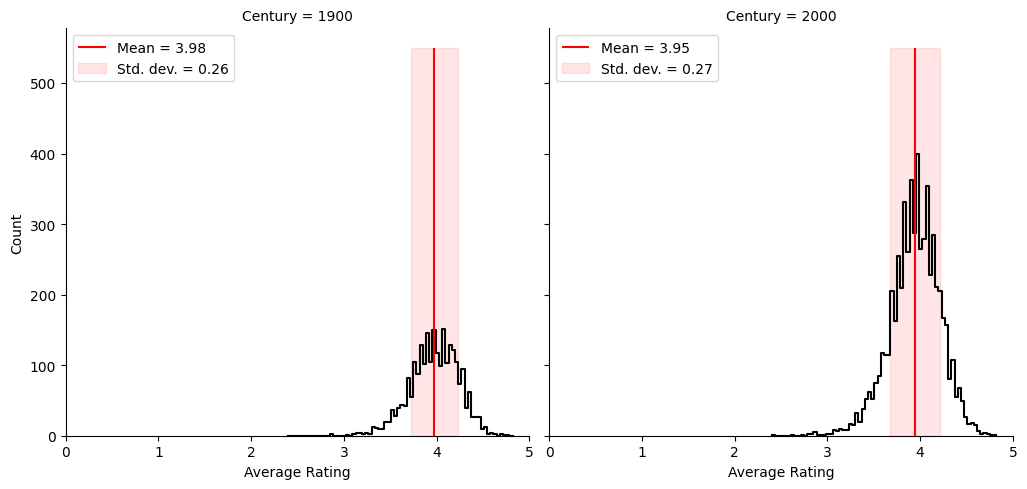

In [11]:
# May have something good for relational analysis
# D

books = pd.read_csv("books.csv")

# Remove books with no/few ratings
books = books[books["ratings_count"] > 100]

# Find optimal histogram parameters
iqr = books["average_rating"].quantile(0.75) - books["average_rating"].quantile(0.25)
n_books = len(books.index)

# Create century column 
books["publication_date"] = pd.to_datetime(books["publication_date"])
books["Century"] = pd.to_numeric((books["publication_date"].dt.year-49.9).round(-2), downcast = "integer")

# Histogram
fig = sns.displot(books, x = "average_rating", col = "Century", col_wrap = 4, binwidth = 2*iqr / (n_books**(1/3)), stat = "count", element = "step", color = "black", fill = False)


# Add means and standard deviations
for i in range(0, len(fig.axes)):
    ax = fig.axes[i]
    century = fig.col_names[i]

    data_in_current_century = books[books["Century"] == century]
    avg = data_in_current_century["average_rating"].mean()
    std = data_in_current_century["average_rating"].std()

    # Vertical bar for mean
    ax.vlines(avg, 0, 550, "r", label = f"Mean = {avg :.2f}")
    ax.fill_between([avg-std,avg+std],[0,0],[550,550], alpha = 0.1, color = "r", label = f"Std. dev. = {std :.2f}")
    ax.legend(loc = "upper left")
    ax.set(xlabel = "Average Rating")

plt.xlim(0,5)
plt.show()


# cheese_data.csv

C:\Users\uqcwest5\AppData\Local\Temp\ipykernel_27264\2749934676.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.ax.set_yticklabels(ylabels)
C:\Users\uqcwest5\AppData\Local\Temp\ipykernel_27264\2749934676.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.ax.set_yticklabels(ylabels)
C:\Users\uqcwest5\AppData\Local\Temp\ipykernel_27264\2749934676.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.ax.set_yticklabels(ylabels)
C:\Users\uqcwest5\AppData\Local\Temp\ipykernel_27264\2749934676.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.ax.set_yticklabels(ylabels)
C:\Users\uqcwest5\AppData\Local\Temp\ipykernel_27264\2749934676.py:3

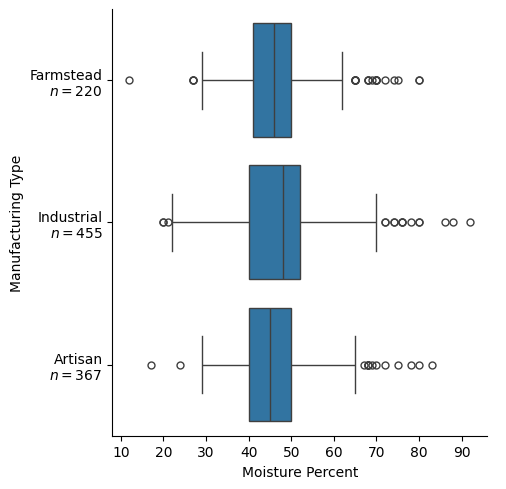

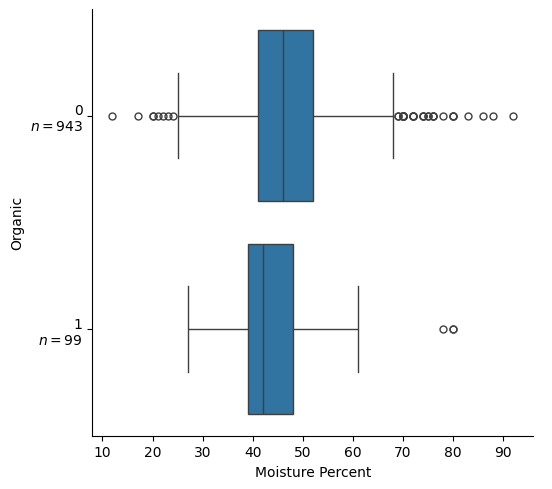

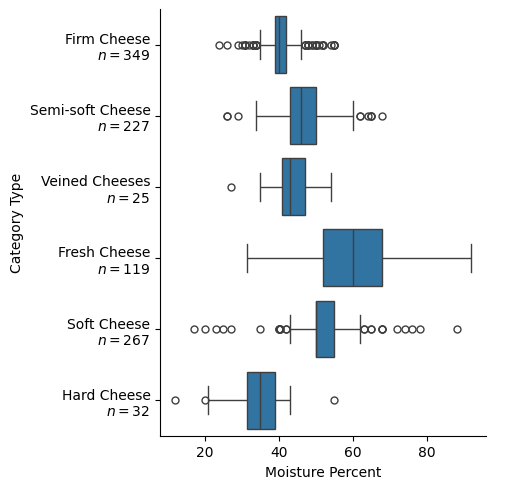

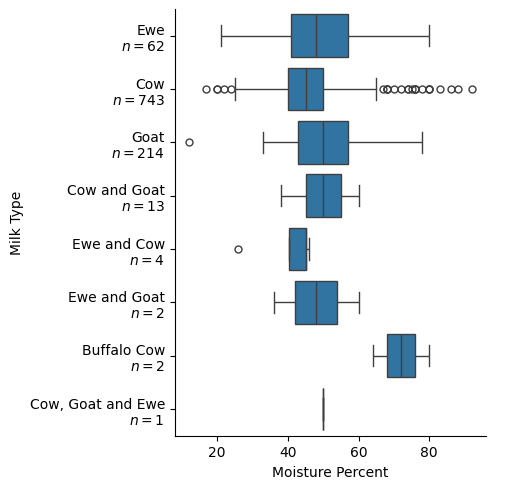

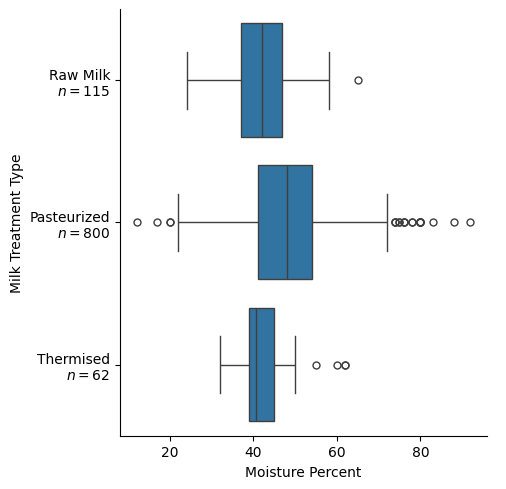

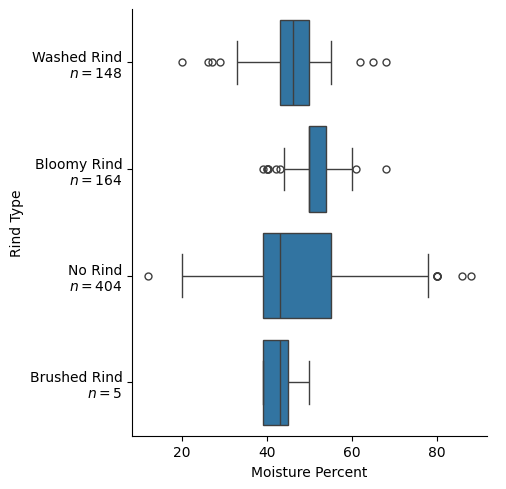

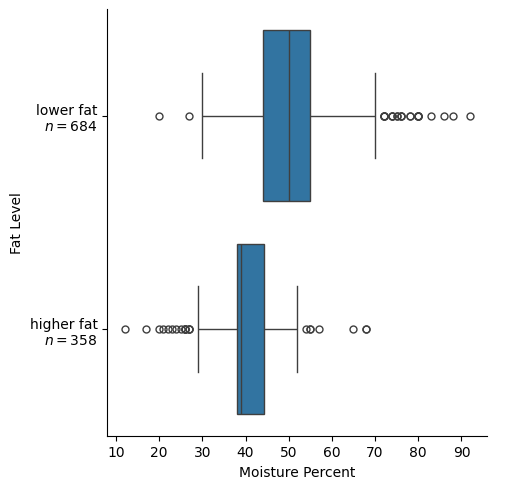

In [77]:
# Verdict:
# Good for categorical analysis (there is one numerical variable, MoisturePercent, and lots of categorical ones)
# Poor for relational analysis
# Could yields some interesting distributions, statistics


def separate_words(s: str) -> str:
    """Takes CamelCase strings and makes them Title Case by inserting spaces before capital letters"""
    i = 1
    for letter in s[1:]:
        if letter.isupper() == True:
            s = s[:i] + " " + s[i:]
            i += 1
        
        i += 1

    return s

cheese = pd.read_csv("cheese_data.csv")

# Remove all columns with more than 10 unique responses

for col in [x for x in cheese.columns if "Moisture" not in x and len(cheese[x].unique()) < 10]:
    fig = sns.catplot(cheese, x = "MoisturePercent", y = col, kind = "box", orient = "h")

    # Put sample size in labels
    ylabels = []
    for var in [label.get_text() for label in fig.ax.get_yticklabels()]:

        if var == "0": var = 0
        elif var == "1": var = 1

        n = (cheese[col] == var).sum()
        ylabels.append(str(var) + "\n$n = " + str(n) + "$")
    
    fig.ax.set_yticklabels(ylabels)
    fig.ax.set_xlabel(separate_words("MoisturePercent"))

    new_label = separate_words(fig.ax.get_ylabel())
    
    if "En" in new_label:
        new_label = new_label[:-3]

    fig.ax.set_ylabel(new_label)


# melb_data.csv

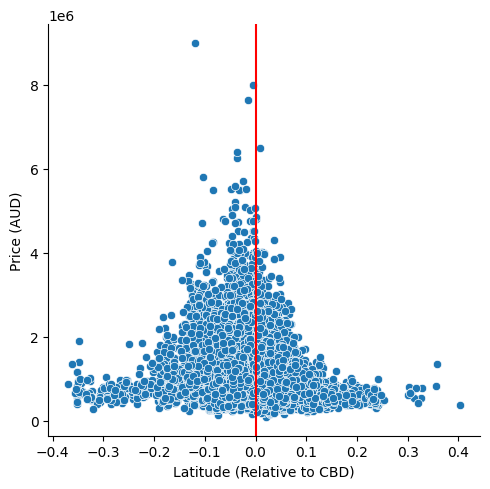

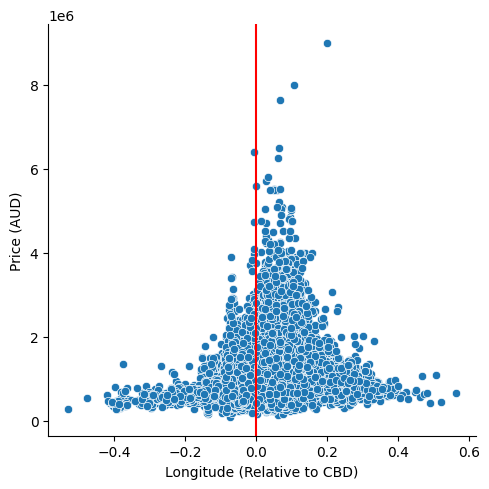

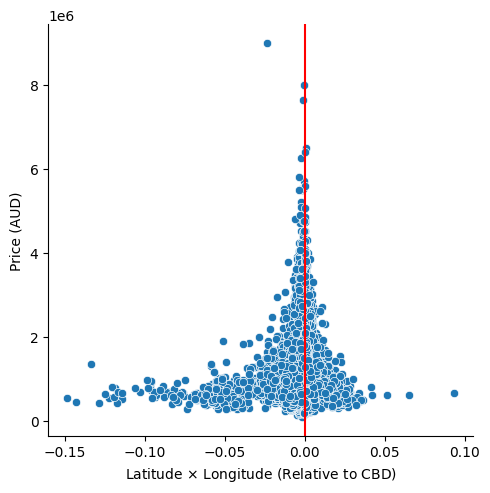

In [155]:
melb = pd.read_csv("melb_data.csv")


melb = melb.rename(columns = {"Lattitude": "Latitude", "Longtitude": "Longitude"})

MELB_LAT = -37.8124
MELB_LONG = 144.9623

melb["Latitude"] = melb["Latitude"] - MELB_LAT
melb["Longitude"] = melb["Longitude"] - MELB_LONG

melb["latlong"] = melb["Latitude"]*melb["Longitude"]

for var in ("Latitude", "Longitude", "latlong"):
    fig = sns.relplot(melb, x = var, y = "Price")
    ylim = fig.ax.get_ylim()


    fig.ax.vlines(0, ylim[0], ylim[1], color = "r")
    fig.ax.set_ylim(ylim)

    if var == "latlong":
        plt.xlabel("Latitude $\\times$ Longitude (Relative to CBD)")
    else:
        plt.xlabel(var + " (Relative to CBD)")
    plt.ylabel("Price (AUD)")


# Players2024.csv

,name,birth_date,height_cm,positions,nationality,Age,Club
0,James Milner,1986-01-04,175.0,Midfield,England,38,Brighton and Hove Albion Football Club
1,Anastasios Tsokanis,1991-05-02,176.0,Midfield,Greece,33,Volou Neos Podosferikos Syllogos
2,Jonas Hofmann,1992-07-14,176.0,Midfield,Germany,32,Bayer 04 Leverkusen Fußball
3,Pepe Reina,1982-08-31,188.0,Goalkeeper,Spain,42,Calcio Como
4,Lionel Carole,1991-04-12,180.0,Defender,France,33,Kayserispor Kulübü


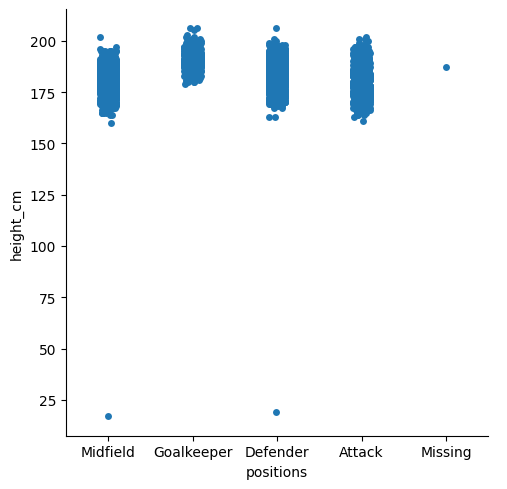

In [171]:
# A bit boring, maybe find some better data....

# Are average heights decreasing over time?

players = pd.read_csv("Players2024.csv")

display(players.head(5))

players["birth_date"] = pd.to_datetime(players["birth_date"])

sns.catplot(players, x = "positions", y = "height_cm")

# weatherAUS.csv

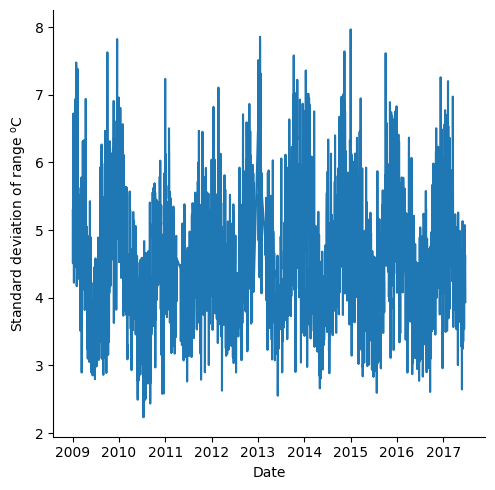

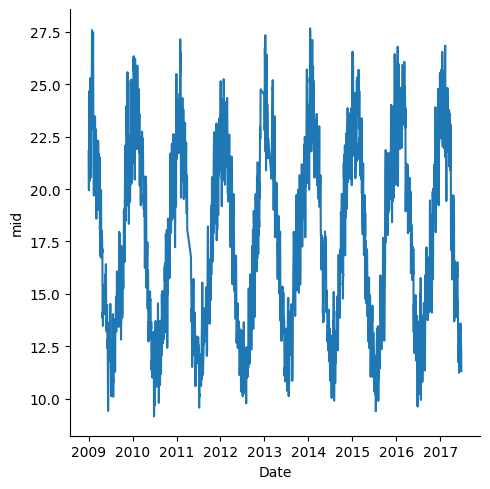

In [201]:
# Variance of max - min over time

weather = pd.read_csv("weatherAUS.csv")


weather["range"] = weather["MaxTemp"] - weather["MinTemp"]

weather["Date"] = pd.to_datetime(weather["Date"])
weather["mid"] = weather["MaxTemp"] - 0.5*weather["range"]

weather = weather[["Date","range","mid"]]

weather = weather[weather["Date"].dt.year >= 2009]

wg = weather.groupby("Date").agg("std")

sns.relplot(wg, x = "Date", y = "range", kind = "line")

plt.ylabel("Standard deviation of range $^\\text{o}$C")

# Average of middle temp over time
wg = weather.groupby("Date").agg("mean")
sns.relplot(wg, x = "Date", y = "mid", kind = "line")


